<img src="https://www.projectcubicle.com/wp-content/uploads/2022/04/Ethical-Problem-of-Artificial-Intelligence-4.jpg"><br>
# <center><strong><font color=orange> Utilizando a Biblioteca PyCaret para Prever Preços de Ações </font></strong></center>

## <strong>Introdução</strong><br>

Este desafio teve como objetivo principal empregar técnicas avançadas de aprendizado de máquina (machine learning) para desenvolver um Modelo Preditivo capaz de estimar com precisão o preço de fechamento das ações da Petrobras ou de outras empresas extraídas do site <a href="https://br.financas.yahoo.com/screener">Yahoo Finanças</a>. A abordagem escolhida para esta análise é a regressão linear, um método estatístico robusto e amplamente utilizado para modelar a relação entre variáveis e fazer previsões.

Para alcançar este objetivo, utilizaremos a biblioteca <a href="https://pycaret.org/">PyCaret</a>, uma ferramenta de código aberto e baixo código (low-code) projetada para simplificar e automatizar o processo de criação de modelos de machine learning em Python. A `PyCaret` oferece uma série de vantagens significativas para este projeto:

1. Ela permite desenvolver um Modelo Preditivo capaz de estimar com precisão o preço de fechamento das ações da Petrobras, uma das maiores empresas petrolíferas do mundo e um dos pilares da economia brasileira.

2. Simplifica e automatiza o processo de criação de modelos de machine learning, tornando o desenvolvimento mais eficiente e acessível.

## A PyCaret oferece uma série de vantagens significativas para este projeto:<br>

- **`Eficiência`**: Permite a rápida experimentação e comparação de múltiplos modelos de regressão.
- **`Facilidade de uso`**: Sua interface intuitiva reduz a complexidade do desenvolvimento de modelos, tornando-o acessível mesmo para profissionais com experiência limitada em programação.
- **`Automação`**: Oferece funcionalidades automatizadas para pré-processamento de dados, seleção de features, treinamento de modelos e otimização de hiperparâmetros.
- **`Flexibilidade`**: Suporta uma ampla gama de algoritmos de machine learning e permite fácil integração com outras bibliotecas populares do ecossistema Python.

Ao longo deste estudo, exploraremos diversas variáveis que podem influenciar o preço das ações, como indicadores econômicos, preços de uma empresa no mercado internacional, dados fundamentalistas da empresa e análises técnicas do mercado de ações. O **Modelo de Regressão Linear** será treinado com dados históricos e sua performance será avaliada utilizando métricas apropriadas, como o erro médio quadrático (MSE) e o coeficiente de determinação (R²).<br>

Além disso, discutiremos as implicações práticas deste `Modelo Preditivo`, suas limitações e possíveis aplicações no contexto do `Mercado Financeiro` e da tomada de decisões de investimento. Este estudo não apenas demonstrará a aplicação prática de técnicas de **Machine Learning em Finanças**, mas também fornecerá insights valiosos sobre os fatores que influenciam o comportamento das ações de empresas do Brasil e de outros paises.<br>

<strong><hr></strong>

<center><img alt="" class="bg mk ml c" width="382" height="56" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:420/1*-_RmJIzCCL_GqhcR5bgowQ.png"></center>

### <strong> Importando as Bibliotecas Necessárias </strong>

No código a seguir, será utilizada a **Biblioteca** `yfinance` para baixar dados financeiros de ações, se precisar. O comando `%pip install --upgrade yfinance` é usado para atualizar a biblioteca **yfinance**. Esta biblioteca facilita a obtenção de dados financeiros históricos e em tempo real, permitindo que os usuários realizem análises financeiras de forma programática no Python.

In [25]:
# Usar esse comando SE precisar atualizar o módulo
%pip install --upgrade yfinance
%pip install --upgrade pycaret
%pip install --upgrade threadpoolctl
%pip install sktime >= 0.19.2

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/73.5 kB ? eta -:--:--
     ---------------------------------        61.4/73.5 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 73.5/73.5 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.40
    Uninstalling yfinance-0.2.40:
      Successfully uninstalled yfinance-0.2.40
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


No código a seguir, está sendo **importada a biblioteca** `pandas` como `pd` e **importada a biblioteca** `yfinance` como `yf`. A **biblioteca** `pandas` é utilizada para manipulação e análise de dados, enquanto a **biblioteca** `yfinance` é usada para acessar dados financeiros históricos e em tempo real do Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### <strong> Obter dados de ações usando a classe `Ticker` e o método `history` </strong>

No código a seguir, está sendo utilizado a **biblioteca** `yfinance` para obter dados de ações. A **função** `yf.Ticker` é usada para criar um objeto `Ticker` associado ao símbolo da ação 'RADL3.SA'. Em seguida, a **função** `history` é chamada com o **parâmetro** `period='2y'` para obter o histórico de preços da ação nos últimos dois anos. Finalmente, a **função** `display` é utilizada para exibir o dataframe resultante.

In [2]:
df = yf.Ticker('RADL3.SA')
ticket = df.history(period='2y')
display(ticket)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-02 00:00:00-03:00,20.327553,20.468391,19.998932,20.327553,8579480,0.0,0.0
2022-08-03 00:00:00-03:00,20.308772,20.759452,19.998928,20.656172,6576856,0.0,0.0
2022-08-04 00:00:00-03:00,20.750065,21.031740,20.562281,20.890902,10032984,0.0,0.0
2022-08-05 00:00:00-03:00,20.984795,21.172579,20.750067,20.843958,3673072,0.0,0.0
2022-08-08 00:00:00-03:00,20.862734,20.975405,20.599838,20.834568,5689944,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-03:00,27.120001,27.600000,27.110001,27.299999,5952900,0.0,0.0
2024-07-30 00:00:00-03:00,27.180000,27.620001,26.930000,27.549999,3283800,0.0,0.0
2024-07-31 00:00:00-03:00,27.690001,27.959999,27.490000,27.600000,5383200,0.0,0.0


### <strong> Retirar as colunas que não será usado usanao o método `drop` </strong>

In [3]:
ticket = ticket.drop(['Dividends', 'Stock Splits'], axis=1)
display(ticket)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-02 00:00:00-03:00,20.327553,20.468391,19.998932,20.327553,8579480
2022-08-03 00:00:00-03:00,20.308772,20.759452,19.998928,20.656172,6576856
2022-08-04 00:00:00-03:00,20.750065,21.031740,20.562281,20.890902,10032984
2022-08-05 00:00:00-03:00,20.984795,21.172579,20.750067,20.843958,3673072
2022-08-08 00:00:00-03:00,20.862734,20.975405,20.599838,20.834568,5689944
...,...,...,...,...,...
2024-07-29 00:00:00-03:00,27.120001,27.600000,27.110001,27.299999,5952900
2024-07-30 00:00:00-03:00,27.180000,27.620001,26.930000,27.549999,3283800
2024-07-31 00:00:00-03:00,27.690001,27.959999,27.490000,27.600000,5383200


### <strong> Criar campos de Média Móvel para acrescentar mais `features` ao modelo usando o método `rolling` </strong>

No código a seguir, está sendo utilizado o **ticket** (possivelmente um **DataFrame** do **Pandas**, uma **Biblioteca**), para calcular a **média móvel simples (SMA)** de 7 e 30 dias sobre a coluna **Close**. A **função** **rolling(window=7)** cria uma janela deslizante de 7 períodos, e **mean()** calcula a média dos valores nessa janela. O mesmo processo é repetido para uma janela de 30 períodos com **rolling(window=30)**. Ambas as médias são arredondadas para 2 casas decimais com a **função** **round(2)**. Os resultados são armazenados em novas colunas do **ticket**, chamadas **SMA7**, **SMA15** e **SMA30**. Finalmente, o **DataFrame** atualizado é exibido usando a **função** **display()**.

In [4]:
ticket['SMA7'] = ticket['Close'].rolling(window=7).mean().round(2)
ticket['SMA15'] = ticket['Close'].rolling(window=15).mean().round(2)
ticket['SMA30'] = ticket['Close'].rolling(window=30).mean().round(2)

display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-08-02 00:00:00-03:00,20.327553,20.468391,19.998932,20.327553,8579480,NaN,NaN,NaN
2022-08-03 00:00:00-03:00,20.308772,20.759452,19.998928,20.656172,6576856,NaN,NaN,NaN
2022-08-04 00:00:00-03:00,20.750065,21.031740,20.562281,20.890902,10032984,NaN,NaN,NaN
2022-08-05 00:00:00-03:00,20.984795,21.172579,20.750067,20.843958,3673072,NaN,NaN,NaN
2022-08-08 00:00:00-03:00,20.862734,20.975405,20.599838,20.834568,5689944,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-07-29 00:00:00-03:00,27.120001,27.600000,27.110001,27.299999,5952900,26.35,25.91,25.71
2024-07-30 00:00:00-03:00,27.180000,27.620001,26.930000,27.549999,3283800,26.61,26.07,25.82
2024-07-31 00:00:00-03:00,27.690001,27.959999,27.490000,27.600000,5383200,26.82,26.24,25.91


### <strong> Separar os últimos 30 dias de pregão (cerca de 30 dias) para `Testar a Previsão` </strong>

No código a seguir, está sendo retirado um subconjunto dos últimos 30 dias de dados de pregão de um DataFrame denominado **`ticket`** (classificado como *Classe*). A função **`tail(30)`** (classificada como *Função*) é utilizada para selecionar as últimas 30 linhas do DataFrame, presumivelmente representando aproximadamente 30 dias de pregão. Este subconjunto é então armazenado na variável **`ticket_text`** (classificada como *Parâmetro*). Por fim, o conteúdo de **`ticket_text`** é exibido na tela utilizando a função **`display`** (classificada como *Função*).

In [5]:
ticket_test = ticket.tail(30)
display(ticket_test)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2024-06-24 00:00:00-03:00,25.744786,26.253890,25.435328,26.134102,6986900,25.21,25.11,25.83
2024-06-25 00:00:00-03:00,26.134101,26.323769,25.954416,26.323769,9733400,25.31,25.19,25.83
2024-06-26 00:00:00-03:00,26.054241,26.363697,25.974381,26.363697,6103800,25.50,25.28,25.81
2024-06-27 00:00:00-03:00,26.253890,26.643208,26.094171,26.493471,3490000,25.79,25.38,25.79
2024-06-28 00:00:00-03:00,26.313785,26.403628,25.395398,25.634977,8547600,25.92,25.40,25.72
2024-07-01 00:00:00-03:00,25.255643,25.694873,25.215714,25.555119,2775200,26.04,25.43,25.66
2024-07-02 00:00:00-03:00,25.634978,25.634978,25.185766,25.275608,3496200,25.97,25.45,25.57
2024-07-03 00:00:00-03:00,25.455293,25.824645,25.305556,25.595047,5888600,25.89,25.51,25.51
2024-07-04 00:00:00-03:00,25.879999,25.879999,25.020000,25.139999,4933900,25.72,25.53,25.44


### <strong> Remover os últimos 30 dias do `Dataframe Original` </strong>

No código a seguir, está sendo utilizada a função **`drop`** para remover as últimas 30 linhas do **`DataFrame`** chamado **`ticket`**. Para isso, é usado o método **`tail`**, que seleciona as últimas 30 linhas, e o atributo **`index`** para obter os índices dessas linhas. A função **`drop`** então exclui essas linhas do **`DataFrame`**, com a alteração sendo feita no próprio objeto original devido ao parâmetro **`inplace=True`**. Após essa operação, a função **`display`** é utilizada para exibir o **`DataFrame`** atualizado.

In [6]:
ticket.drop(ticket.tail(30).index, inplace=True)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-08-02 00:00:00-03:00,20.327553,20.468391,19.998932,20.327553,8579480,NaN,NaN,NaN
2022-08-03 00:00:00-03:00,20.308772,20.759452,19.998928,20.656172,6576856,NaN,NaN,NaN
2022-08-04 00:00:00-03:00,20.750065,21.031740,20.562281,20.890902,10032984,NaN,NaN,NaN
2022-08-05 00:00:00-03:00,20.984795,21.172579,20.750067,20.843958,3673072,NaN,NaN,NaN
2022-08-08 00:00:00-03:00,20.862734,20.975405,20.599838,20.834568,5689944,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-17 00:00:00-03:00,25.654943,25.654943,24.816416,25.026047,5162700,25.09,25.22,25.98
2024-06-18 00:00:00-03:00,25.026047,25.026047,24.437081,24.457047,6273500,24.98,25.13,25.92
2024-06-19 00:00:00-03:00,24.516941,24.846362,24.277362,24.726574,4512800,24.93,25.06,25.88


### <strong> Empurar os valores da ação para frente em um dia usando o método `shift(-1)` </strong>

No código a seguir, está sendo utilizada a **função** `shift(-1)` da **classe** `DataFrame` da **biblioteca** `pandas` para empurrar os valores da coluna **parâmetro** `Close` do **DataFrame** `ticket` um dia para frente. Isso significa que cada valor da coluna `Close` será substituído pelo valor do dia seguinte. A **função** `display()` então exibe o `DataFrame` modificado.

In [7]:
ticket['Close'] = ticket['Close'].shift(-1)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-08-02 00:00:00-03:00,20.327553,20.468391,19.998932,20.656172,8579480,NaN,NaN,NaN
2022-08-03 00:00:00-03:00,20.308772,20.759452,19.998928,20.890902,6576856,NaN,NaN,NaN
2022-08-04 00:00:00-03:00,20.750065,21.031740,20.562281,20.843958,10032984,NaN,NaN,NaN
2022-08-05 00:00:00-03:00,20.984795,21.172579,20.750067,20.834568,3673072,NaN,NaN,NaN
2022-08-08 00:00:00-03:00,20.862734,20.975405,20.599838,20.853346,5689944,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-17 00:00:00-03:00,25.654943,25.654943,24.816416,24.457047,5162700,25.09,25.22,25.98
2024-06-18 00:00:00-03:00,25.026047,25.026047,24.437081,24.726574,6273500,24.98,25.13,25.92
2024-06-19 00:00:00-03:00,24.516941,24.846362,24.277362,24.746538,4512800,24.93,25.06,25.88


### <strong> Remover todos os valores nulos usando o método `dropna` </strong>

No código a seguir, está sendo utilizada a **função** `dropna` da **biblioteca** `pandas` para remover todos os valores nulos do **DataFrame** `ticket`. O **parâmetro** `inplace=True` é usado para garantir que a operação seja feita no próprio **DataFrame** `ticket`, sem a necessidade de criar uma cópia. Em seguida, o **DataFrame** resultante é exibido utilizando a **função** `display`.

In [8]:
ticket.dropna(inplace=True)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-09-13 00:00:00-03:00,21.548146,21.782876,21.228914,21.313416,6303960,21.38,21.15,21.11
2022-09-14 00:00:00-03:00,21.519977,21.623257,21.275859,21.247688,2914600,21.40,21.14,21.14
2022-09-15 00:00:00-03:00,21.304023,21.501195,21.116240,21.116243,4371952,21.40,21.15,21.16
2022-09-16 00:00:00-03:00,21.125632,21.379139,21.012962,21.473032,10848864,21.39,21.14,21.17
2022-09-19 00:00:00-03:00,20.975406,21.585702,20.919072,21.632648,3786536,21.41,21.18,21.19
...,...,...,...,...,...,...,...,...
2024-06-14 00:00:00-03:00,24.886293,25.824645,24.886293,25.026047,5630700,25.10,25.29,26.02
2024-06-17 00:00:00-03:00,25.654943,25.654943,24.816416,24.457047,5162700,25.09,25.22,25.98
2024-06-18 00:00:00-03:00,25.026047,25.026047,24.437081,24.726574,6273500,24.98,25.13,25.92


### <strong> Remover o índice usando o método `reset_index` </strong>

In [9]:
ticket.reset_index(drop=True, inplace=True)
ticket_test.reset_index(drop=True, inplace=True)

display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
0,21.548146,21.782876,21.228914,21.313416,6303960,21.38,21.15,21.11
1,21.519977,21.623257,21.275859,21.247688,2914600,21.40,21.14,21.14
2,21.304023,21.501195,21.116240,21.116243,4371952,21.40,21.15,21.16
3,21.125632,21.379139,21.012962,21.473032,10848864,21.39,21.14,21.17
4,20.975406,21.585702,20.919072,21.632648,3786536,21.41,21.18,21.19
...,...,...,...,...,...,...,...,...
436,24.886293,25.824645,24.886293,25.026047,5630700,25.10,25.29,26.02
437,25.654943,25.654943,24.816416,24.457047,5162700,25.09,25.22,25.98
438,25.026047,25.026047,24.437081,24.726574,6273500,24.98,25.13,25.92
439,24.516941,24.846362,24.277362,24.746538,4512800,24.93,25.06,25.88


### <strong> Visualizar as correlações entre as variáveis usando o método `corr()` </strong>

No código a seguir, está sendo usada a **função** `corr()` do **dataFrame** `ticket` para visualizar as correlações entre as variáveis. A função `corr()` é uma ferramenta poderosa da **biblioteca** `pandas`, utilizada para calcular a matriz de correlação entre todas as colunas de um **dataFrame**. Essa matriz mostra o coeficiente de correlação de Pearson entre pares de variáveis, permitindo identificar relações lineares entre elas. Esse processo é essencial para a análise exploratória de dados, ajudando a compreender as dependências e associações entre diferentes variáveis dentro do conjunto de dados.

In [10]:
ticket.corr()

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Open,1.000000,0.994016,0.994696,0.975499,-0.147320,0.983308,0.953452,0.905487
High,0.994016,1.000000,0.994889,0.982330,-0.123973,0.980123,0.948250,0.899579
Low,0.994696,0.994889,1.000000,0.982458,-0.166233,0.981893,0.951033,0.902785
Close,0.975499,0.982330,0.982458,1.000000,-0.152709,0.963159,0.932877,0.887952
Volume,-0.147320,-0.123973,-0.166233,-0.152709,1.000000,-0.149397,-0.156568,-0.139466
SMA7,0.983308,0.980123,0.981893,0.963159,-0.149397,1.000000,0.982404,0.937062
SMA15,0.953452,0.948250,0.951033,0.932877,-0.156568,0.982404,1.000000,0.973564
SMA30,0.905487,0.899579,0.902785,0.887952,-0.139466,0.937062,0.973564,1.000000


No código a seguir, está sendo utilizada a **Biblioteca** `seaborn` (referenciada como `sns`) para gerar um **Gráfico de Calor** com a função **Função** `heatmap()`. O parâmetro `ticket.corr()` passa a matriz de correlação do DataFrame `ticket`, e o parâmetro `annot=True` adiciona anotações às células do gráfico, exibindo os valores de correlação diretamente no gráfico.

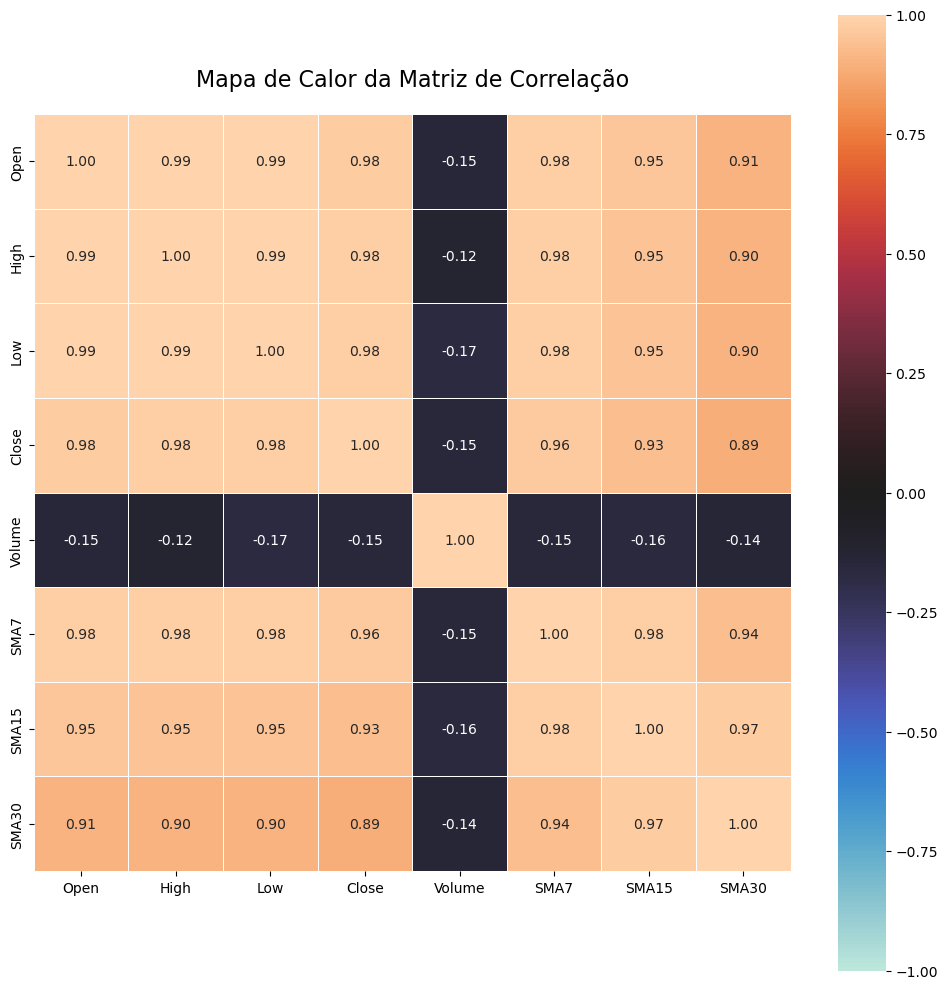

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(ticket.corr(), annot=True, vmin=-1, vmax=1,  center=0,  square=True,  linewidths=0.5,  fmt='.2f')
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16, pad=20)
plt.tight_layout()

plt.show()

No código a seguir, está sendo utilizada a **função** `hist` da **classe** `ticket` para gerar um histograma. O **parâmetro** `figsize` é usado para definir o tamanho da figura gerada, com dimensões de 20 por 20 unidades.

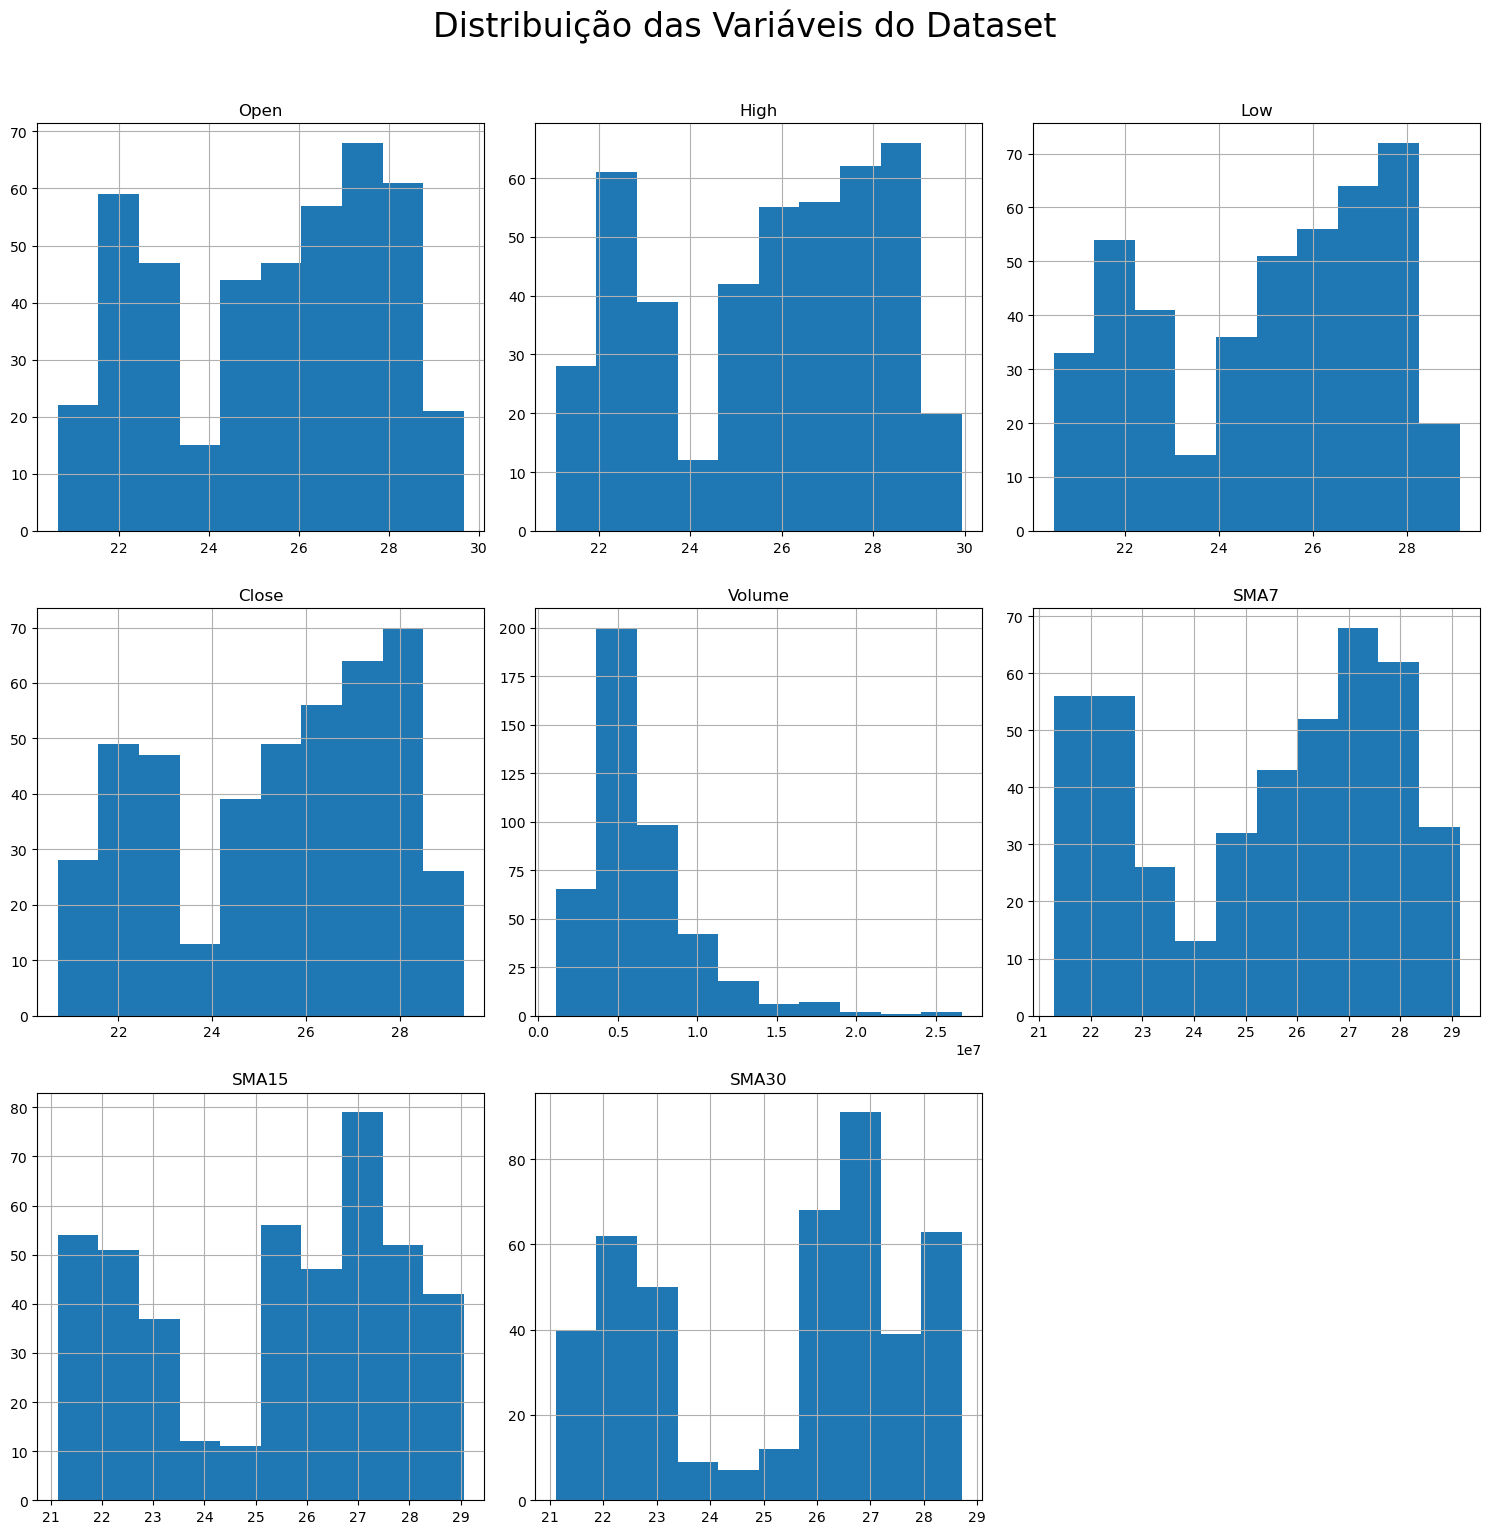

In [12]:
fig = ticket.hist(figsize=(15,15))
plt.suptitle("Distribuição das Variáveis do Dataset", fontsize=24, y=1.02)
plt.tight_layout()

plt.show()

No código a seguir, está sendo utilizada a **biblioteca** `seaborn` para criar um gráfico de pares com a **função** `pairplot` aplicada ao **parâmetro** `ticket`, que representa um DataFrame contendo os dados a serem visualizados. A **função** `pairplot` gera uma matriz de gráficos de dispersão para cada par de variáveis no DataFrame, ajudando a identificar relações e padrões entre as variáveis.

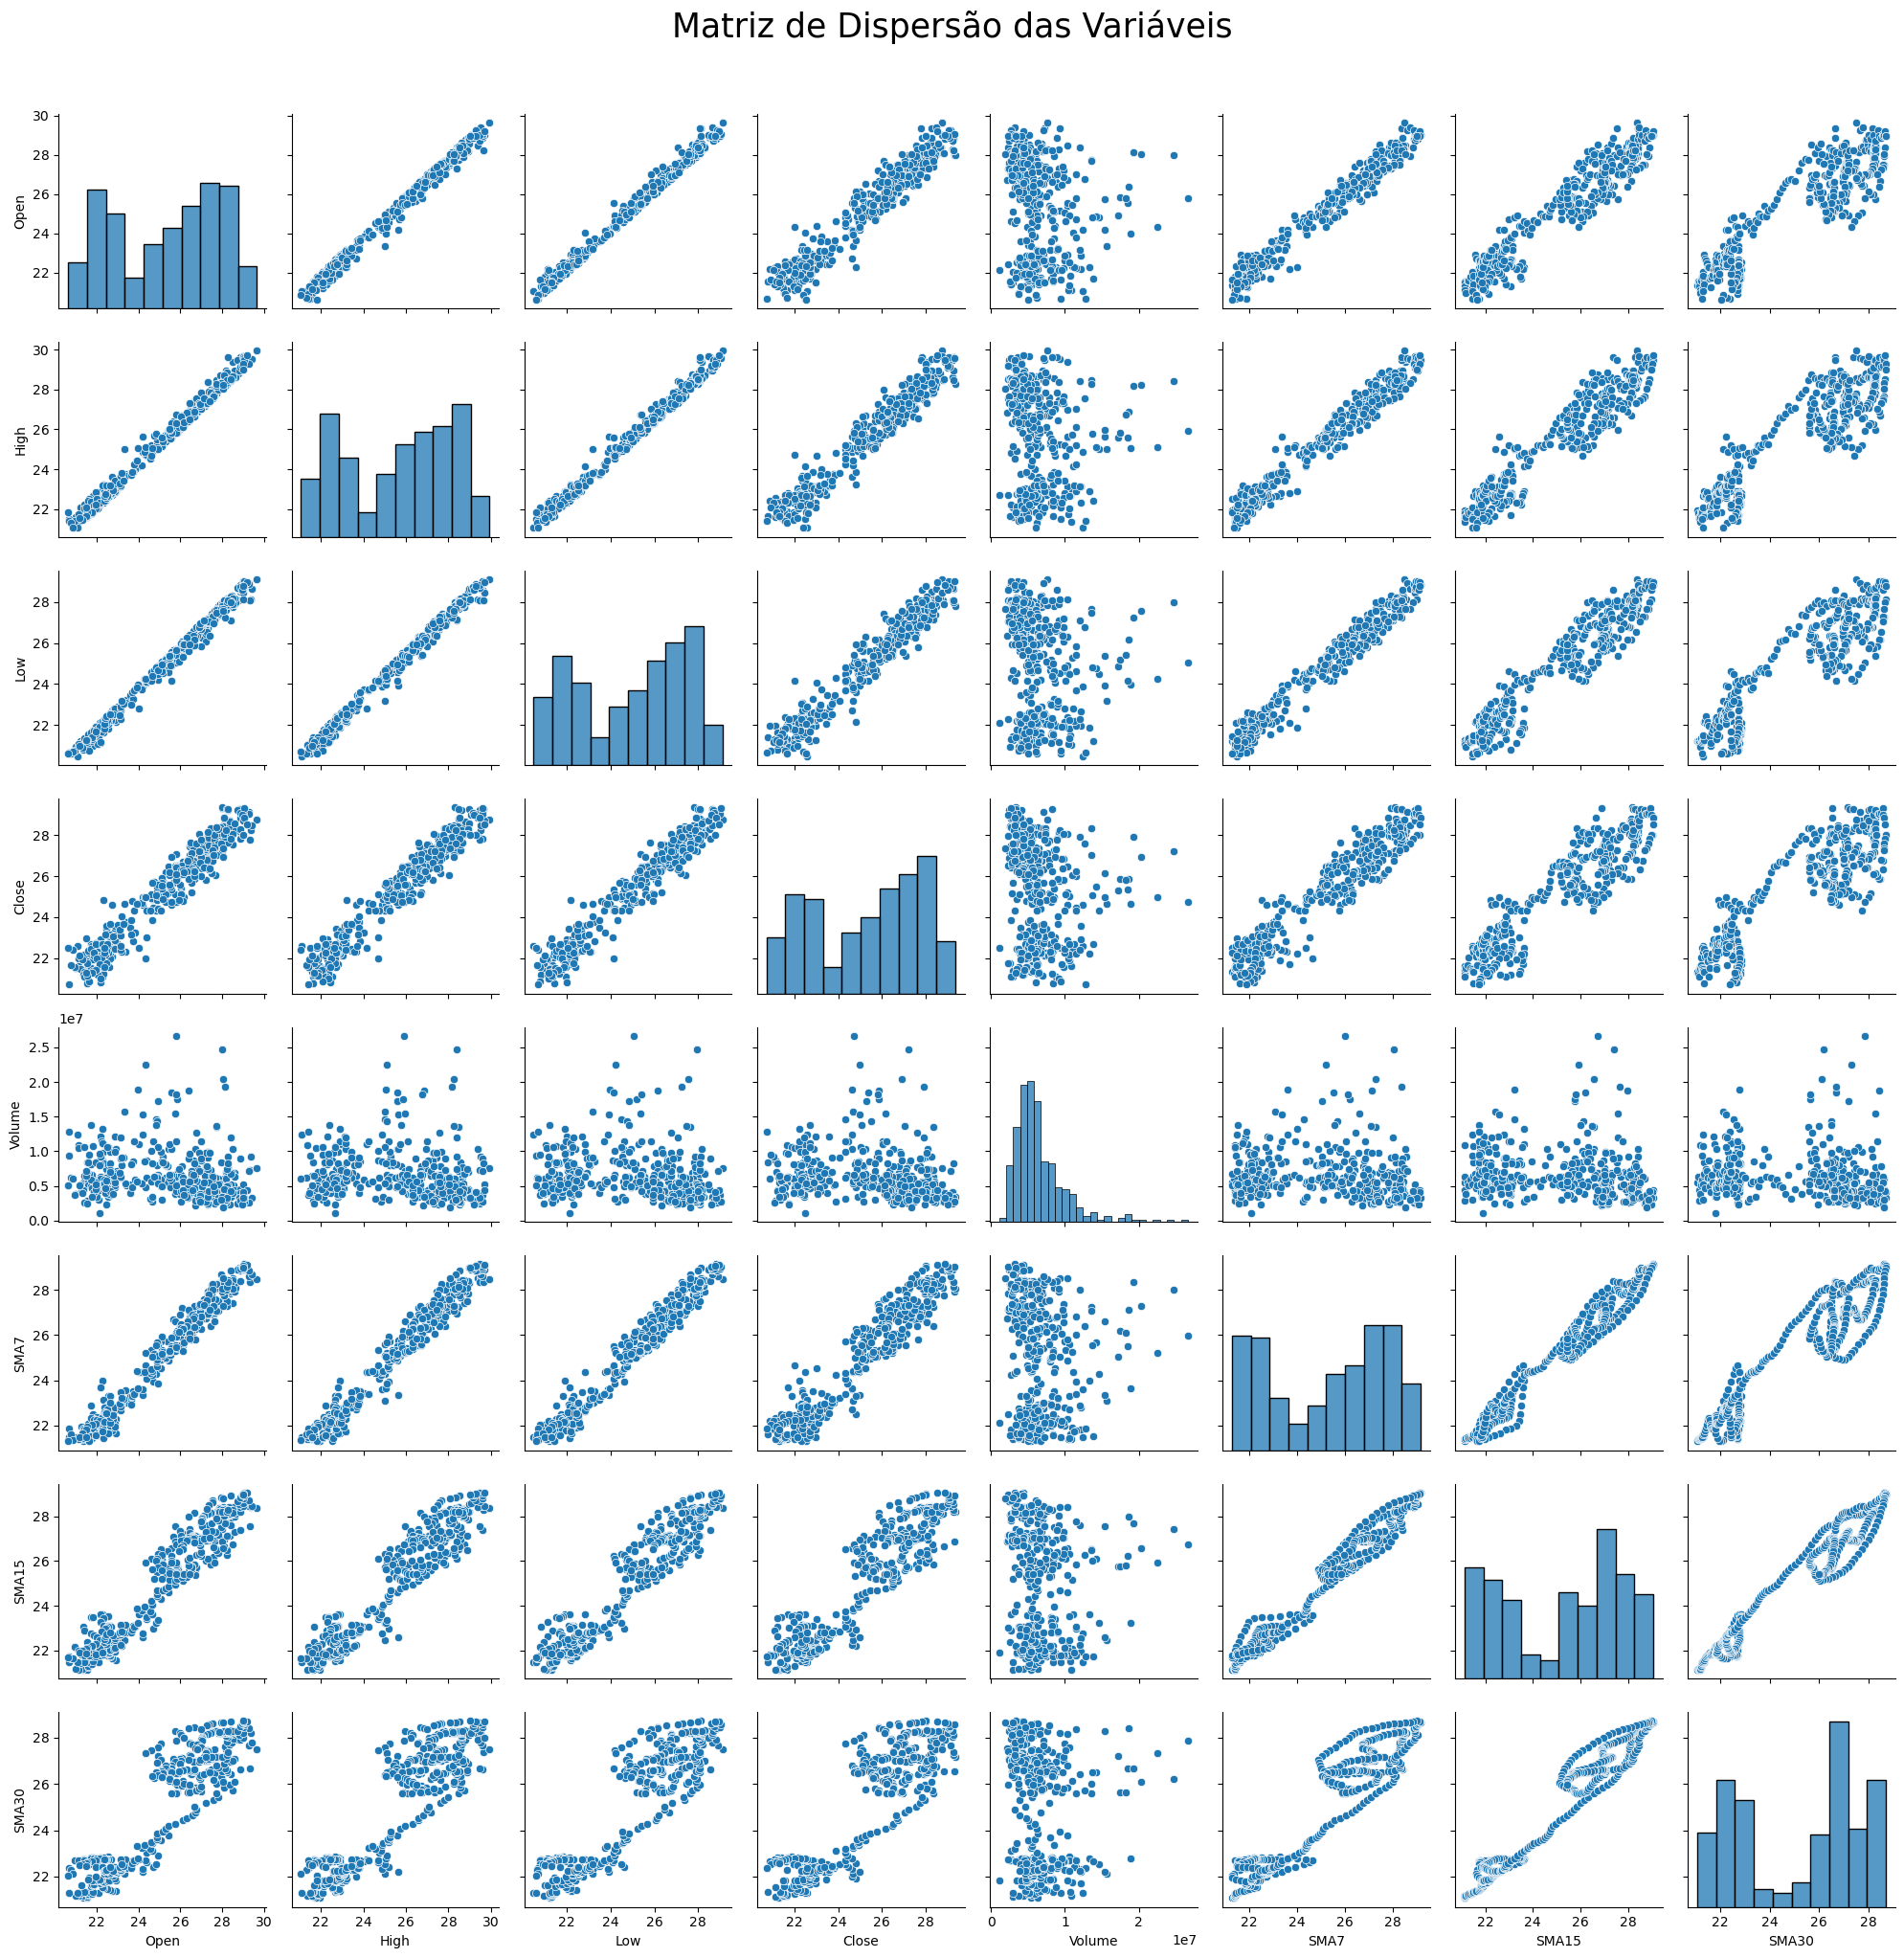

In [17]:
g = sns.pairplot(ticket)
g.fig.suptitle("Matriz de Dispersão das Variáveis", fontsize=25, y=1.02)
plt.tight_layout()

plt.show()

No código a seguir, está sendo utilizada a **biblioteca** `seaborn` (abreviada como `sns`) para gerar um histograma com a **função** `histplot`. O **parâmetro** `ticket['Close']` indica que os dados para o histograma estão sendo extraídos da coluna 'Close' do **dataframe** `ticket`, presumivelmente contendo valores numéricos que representam o fechamento de um determinado item ou ativo em diferentes momentos.

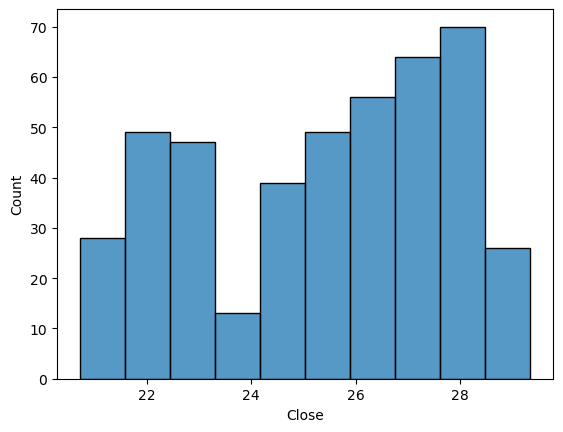

In [13]:
sns.histplot(ticket['Close']);

## <strong><font color=orange> Utilizando `PyCaret` para criar Modelo de Machine Learning </font></strong>

<center><img alt="" class="bg mk ml c" width="382" height="56" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:420/1*-_RmJIzCCL_GqhcR5bgowQ.png"></center>

In [ ]:
# Usar esse comando SE precisar atualizar o módulo
%pip install --upgrade pycaret

### <strong> Importar a biblioteca de Regressão do `Pycaret` e visualizar a coluna alvo usando a função `setup` </strong>

No código a seguir, está sendo utilizada a **biblioteca** `pycaret.regression` para realizar tarefas de regressão. Primeiramente, a biblioteca é importada com `from pycaret.regression import *`, o que permite acesso a todas as funcionalidades disponíveis na mesma. Em seguida, a **função** `setup` é chamada para configurar o ambiente de modelagem, recebendo como **parâmetros** o **dataframe** `ticket`, o nome da [coluna alvo] `target='Close'`, um **session_id** (usado para garantir a reprodutibilidade dos resultados com a mesmas informações) definido como `123`, e a opção `remove_multicollinearity` definida como `False` para não remover colunas com alta correlação.

In [14]:
from pycaret.regression import *

setup(data = ticket, target = 'Close', session_id = 123, remove_multicollinearity=False);

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(441, 8)"
4,Transformed data shape,"(441, 8)"
5,Transformed train set shape,"(308, 8)"
6,Transformed test set shape,"(133, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


### <strong> Comparar os modelos e informar os três melhores escolhidos usando a função `compare_models` </strong>

No código a seguir, está sendo utilizada a **função** `compare_models` da **biblioteca** PyCaret para comparar diferentes modelos de machine learning e selecionar os três melhores, especificados pelo **parâmetro** `n_select=3`. Em seguida, os três melhores modelos são exibidos usando a **função** `display`. Este processo automatiza a comparação de modelos, permitindo ao usuário identificar rapidamente os melhores candidatos para o problema em questão.

In [15]:
top3_models = compare_models(n_select=3)
display(top3_models)

[LinearRegression(n_jobs=-1), Ridge(random_state=123), BayesianRidge()]

#### <strong><font color=red>Observações e Definições de Cada Métrica</font></strong>

A tabela acima organiza o *ranking* de modelos se baseando no coeficiente de determinação R², que é uma métrica muito utilizada para observar o quão bem o modelo se ajusta ao conjunto de dados utilizado. Com isso, podemos ver que `MAE`, `MSE`, `RMSE`, `R2`, `RMSLE` e `MAPE` são todas métricas utilizadas para avaliar a acurácia do nosso modelo:<br>

- **MAE (Mean Absolute Error)**: `MAE` é a média dos valores absolutos das diferenças entre os valores previstos e reais. *Menor valor indica melhor performance.* 🔻
- **MSE (Mean Squared Error)**: `MSE` é a média dos quadrados das diferenças entre os valores previstos e reais. *Menor valor indica melhor performance.* 🔻
- **RMSE (Root Mean Squared Error)**: `RMSE` é a raiz quadrada do MSE. *Menor valor indica melhor performance.* 🔻
- **R² (Coefficient of Determination)**: `R²` varia de 0 a 1, sendo 1 o ideal, indicando que a variância dos dados é completamente explicada pelo modelo. *Quanto maior, melhor performance.* 🔺
- **RMSLE (Root Mean Squared Logarithmic Error)**: `RMSLE` é usado principalmente em previsões de séries temporais ou quando os valores são exponencialmente distribuídos. *Menor valor indica melhor performance.* 🔻
- **MAPE (Mean Absolute Percentage Error)**: `MAPE` mede a média dos erros percentuais absolutos. *Menor valor indica melhor performance.* 🔻<br><hr>

### <strong> Testar os 3 melhores modelos 10 vezes e analisar as médias das métricas de `acurácia` </strong>

No código a seguir, está sendo utilizado a **função** `create_model` com diferentes parâmetros para criar os 3 melhores modelos com o parâmetro `fold=10`. Em seguida, cada modelo criado é exibido utilizando a **função** `display`. O parâmetro `fold=10` sugere que a validação cruzada está sendo utilizada com 10 dobras para avaliar o desempenho dos modelos.

In [18]:
model_lr = create_model('lr', fold=10)
display(model_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3229,0.1529,0.3911,0.9712,0.0154,0.0129
1,0.3262,0.1727,0.4156,0.9637,0.0157,0.0129
2,0.3149,0.1297,0.3601,0.9714,0.0143,0.0128
3,0.3442,0.1642,0.4052,0.9712,0.0155,0.0136
4,0.2824,0.1466,0.3829,0.9787,0.0146,0.0114
5,0.3862,0.2311,0.4808,0.9633,0.0191,0.0155
6,0.3248,0.1856,0.4308,0.9720,0.0160,0.0127
7,0.3319,0.1772,0.4210,0.9717,0.0161,0.0131
8,0.3595,0.2090,0.4572,0.9582,0.0178,0.0144


LinearRegression(n_jobs=-1)

In [19]:
model_ridge = create_model('ridge', fold=10)
display(model_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3208,0.1474,0.3839,0.9723,0.0151,0.0129
1,0.3273,0.1727,0.4156,0.9637,0.0157,0.0129
2,0.3159,0.1313,0.3623,0.9710,0.0144,0.0128
3,0.3416,0.1622,0.4027,0.9715,0.0154,0.0135
4,0.2832,0.1488,0.3857,0.9784,0.0148,0.0114
5,0.3840,0.2324,0.4821,0.9632,0.0191,0.0154
6,0.3196,0.1819,0.4264,0.9726,0.0159,0.0125
7,0.3346,0.1780,0.4219,0.9716,0.0162,0.0132
8,0.3605,0.2089,0.4571,0.9582,0.0177,0.0144


Ridge(random_state=123)

In [20]:
model_br = create_model('br', fold=10)
display(model_br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3208,0.1475,0.3840,0.9723,0.0152,0.0129
1,0.3274,0.1728,0.4156,0.9637,0.0157,0.0129
2,0.3160,0.1316,0.3627,0.9710,0.0145,0.0128
3,0.3415,0.1621,0.4026,0.9715,0.0154,0.0135
4,0.2833,0.1491,0.3862,0.9784,0.0148,0.0114
5,0.3839,0.2325,0.4822,0.9631,0.0191,0.0154
6,0.3197,0.1819,0.4265,0.9726,0.0159,0.0125
7,0.3349,0.1781,0.4220,0.9716,0.0162,0.0133
8,0.3605,0.2089,0.4571,0.9582,0.0177,0.0144


BayesianRidge()

### <strong> Melhorar ainda mais a performance do modelo usando a função `tune_model` </strong>

No código a seguir, está sendo definida uma **biblioteca** `ridge_params` com um parâmetro **parâmetro** `alpha` que possui uma lista de valores específicos. Em seguida, a função **função** `model_tune_model` é utilizada para ajustar o modelo **modelo** `model_ridge`. O ajuste é realizado com 1000 iterações, otimizando o parâmetro `RMSE` e utilizando a grade personalizada definida em `ridge_params`. Em seguida, cada modelo criado é exibido utilizando a **função** `display`.

In [21]:
model_tune_lr = tune_model(model_lr, n_iter=1000, optimize = 'RMSE')
display(model_tune_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3243,0.1546,0.3931,0.9709,0.0155,0.0130
1,0.3292,0.1745,0.4177,0.9633,0.0158,0.0130
2,0.3203,0.1337,0.3657,0.9705,0.0145,0.0130
3,0.3424,0.1628,0.4035,0.9714,0.0154,0.0135
4,0.2755,0.1407,0.3751,0.9796,0.0142,0.0110
5,0.3890,0.2348,0.4846,0.9628,0.0192,0.0156
6,0.3318,0.1895,0.4353,0.9714,0.0161,0.0130
7,0.3301,0.1763,0.4199,0.9718,0.0161,0.0131
8,0.3538,0.2007,0.4480,0.9598,0.0174,0.0141


Fitting 10 folds for each of 2 candidates, totalling 20 fits


LinearRegression(fit_intercept=False, n_jobs=-1)

In [23]:
ridge_params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
model_tune_ridge = tune_model(model_ridge, n_iter=1000, optimize = 'RMSE', custom_grid = ridge_params)
display(model_tune_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3227,0.1527,0.3908,0.9713,0.0154,0.0129
1,0.3263,0.1727,0.4156,0.9637,0.0157,0.0129
2,0.3149,0.1297,0.3602,0.9714,0.0143,0.0128
3,0.3442,0.1641,0.4051,0.9712,0.0155,0.0136
4,0.2824,0.1467,0.3830,0.9787,0.0146,0.0114
5,0.3861,0.2312,0.4808,0.9633,0.0191,0.0155
6,0.3246,0.1855,0.4307,0.9720,0.0160,0.0127
7,0.3320,0.1772,0.4210,0.9717,0.0161,0.0131
8,0.3596,0.2090,0.4571,0.9582,0.0178,0.0144


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ridge(random_state=123)

In [24]:
model_tune_br = tune_model(model_br, n_iter=1000, optimize = 'RMSE')
display(model_tune_br)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:02:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3233,0.1508,0.3884,0.9716,0.0153,0.0130
1,0.3287,0.1746,0.4178,0.9633,0.0158,0.0130
2,0.3215,0.1350,0.3675,0.9702,0.0146,0.0130
3,0.3404,0.1614,0.4017,0.9717,0.0153,0.0134
4,0.2771,0.1420,0.3768,0.9794,0.0143,0.0111
5,0.3877,0.2358,0.4856,0.9626,0.0193,0.0156
6,0.3291,0.1870,0.4325,0.9718,0.0161,0.0129
7,0.3310,0.1768,0.4204,0.9718,0.0162,0.0131
8,0.3543,0.2004,0.4477,0.9599,0.0174,0.0141


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


BayesianRidge(alpha_1=0.3, alpha_2=0.0005, compute_score=True,
              fit_intercept=False, lambda_1=1e-07, lambda_2=0.3)

## <strong><font color=orange> Análises gráficas </font></strong>

### <strong> Visualizar os erros do modelo escolhido usando a função `plot_model` </strong>

No código a seguir, está sendo utilizada a **função** `plot_model` para visualizar os erros de dois modelos diferentes. Esta **função** faz parte da biblioteca `pycaret`, especializada em machine learning. O primeiro **parâmetro**, `model_ridge`, representa um modelo de regressão Ridge previamente treinado. O segundo **parâmetro**, `model_tune_ridge`, refere-se a uma versão ajustada do mesmo modelo após um processo de afinação de hiperparâmetros. O **parâmetro** `plot='error'` indica que o tipo de gráfico a ser gerado é o de erros, o que ajuda na análise da performance dos modelos comparando seus erros preditivos.

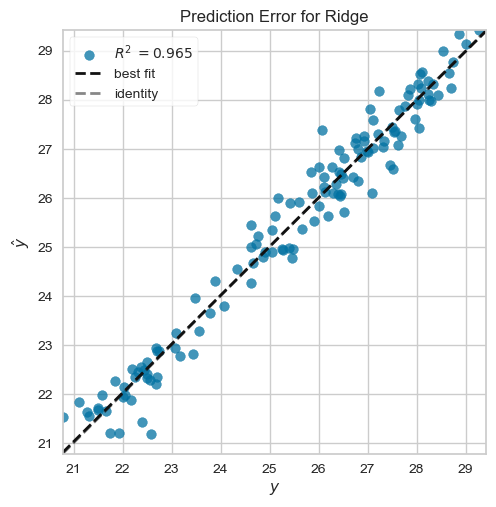

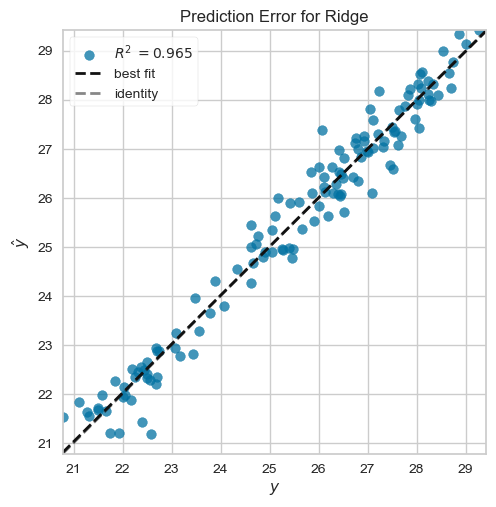

In [25]:
plot_model(model_ridge, plot='error')
plot_model(model_tune_ridge, plot='error')

### <strong> Avaliando 2 modelos de aprendizado de máquina usando a função `evaluate_model` </strong>

No código a seguir, está sendo utilizada a **função** `evaluate_model` para avaliar dois modelos de aprendizado de máquina. O primeiro modelo é chamado `model_ridge`, enquanto o segundo é `model_tune_ridge`. Ambos são passados como **parâmetros** para a **função** `evaluate_model`, que provavelmente é responsável por realizar alguma análise ou teste de desempenho nesses modelos. A diferença entre os dois modelos pode estar na forma como foram treinados ou ajustados; `model_ridge` pode representar um modelo de regressão ridge padrão, enquanto `model_tune_ridge` sugere que o modelo passou por algum processo de ajuste fino ou otimização de hiperparâmetros. Esta avaliação é essencial para comparar o desempenho dos modelos e escolher o mais eficaz para o problema em questão.

In [26]:
evaluate_model(model_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
evaluate_model(model_tune_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### <strong> Visualizar a melhor `Feature` utilizada no modelo usando a função `plot_model` </strong>

No código a seguir, está sendo utilizada a **função** `plot_model` da **biblioteca** `pycaret`, que é uma ferramenta de machine learning automatizada. O **parâmetro** `model_tune_ridge` representa o modelo de regressão Ridge previamente ajustado e treinado. O **parâmetro** `plot` é configurado com o valor `'feature'`, indicando que o tipo de gráfico a ser gerado é um gráfico de importância de características. Este gráfico visualiza a importância de cada variável de entrada no modelo de regressão Ridge ajustado, ajudando a entender quais características têm mais impacto na predição.

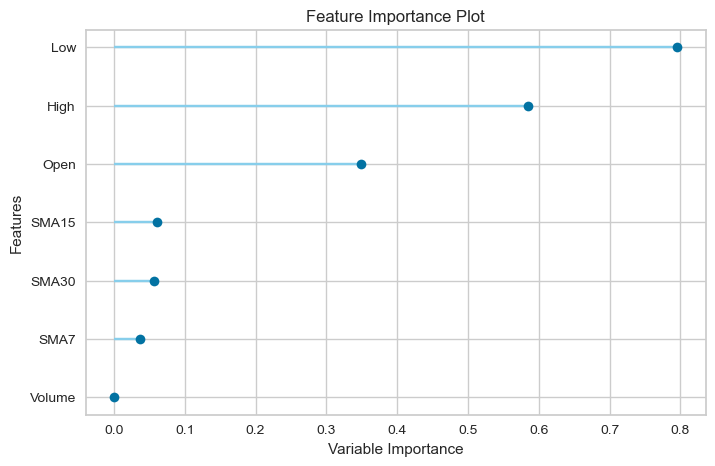

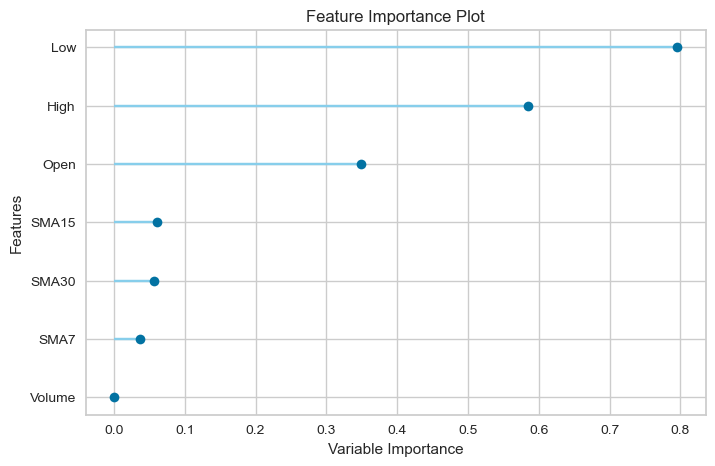

In [29]:
plot_model(model_tune_ridge, plot='feature')
plot_model(model_ridge, plot='feature')

### <strong> Testar os modelos criados com os dados de treinamento usando a função `predict_model` </strong>

No código a seguir, está sendo utilizada a **função** `predict_model` para fazer previsões com três modelos diferentes: `model_tune_lr`, `model_tune_ridge` e `model_tune_br`. A **função** `predict_model`, que pertence a uma **biblioteca** de aprendizado de máquina, recebe como **parâmetro** um modelo previamente ajustado e gera previsões baseadas nos dados fornecidos. O primeiro modelo, `model_tune_lr`, é provavelmente um modelo de regressão linear ajustado; o segundo, `model_tune_ridge`, é um modelo de regressão ridge, que adiciona uma penalização L2 para evitar overfitting; e o terceiro, `model_tune_br`, é um modelo de regressão bayesiana, que incorpora incertezas dos parâmetros na previsão. Esses modelos são utilizados para comparar diferentes técnicas de regressão e avaliar a melhor abordagem para o conjunto de dados em questão.

In [31]:
predict_model(model_tune_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.3386,0.1861,0.4314,0.9644,0.0166,0.0134


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.656178,21.491812,20.609230,9402224,21.450001,21.459999,21.280001,22.580952,21.165372
125,22.884779,23.423800,22.809126,9936160,22.799999,22.129999,22.299999,23.092821,23.242262
287,25.374834,25.741579,25.136946,5436400,25.270000,25.760000,26.520000,25.910082,25.533388
204,28.066525,28.383101,27.997272,4031100,28.299999,28.350000,28.209999,27.868664,28.264736
172,27.741621,28.452438,27.652769,13545900,27.260000,26.549999,25.580000,27.830473,28.154549
...,...,...,...,...,...,...,...,...,...
318,28.834772,28.954130,28.645790,3354400,29.020000,28.530001,28.100000,28.735308,28.790346
151,24.294638,24.863153,24.275686,8482344,24.379999,23.940001,23.360001,24.671665,24.665380
157,25.421589,25.592459,24.586227,10274784,24.889999,24.600000,23.770000,25.051374,24.875894
260,26.622141,27.275080,26.572676,8727800,26.790001,26.969999,26.950001,27.116791,27.062852


In [32]:
predict_model(model_tune_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.3363,0.1821,0.4267,0.9651,0.0165,0.0134


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.656178,21.491812,20.609230,9402224,21.450001,21.459999,21.280001,22.580952,21.181612
125,22.884779,23.423800,22.809126,9936160,22.799999,22.129999,22.299999,23.092821,23.250501
287,25.374834,25.741579,25.136946,5436400,25.270000,25.760000,26.520000,25.910082,25.521731
204,28.066525,28.383101,27.997272,4031100,28.299999,28.350000,28.209999,27.868664,28.230698
172,27.741621,28.452438,27.652769,13545900,27.260000,26.549999,25.580000,27.830473,28.097717
...,...,...,...,...,...,...,...,...,...
318,28.834772,28.954130,28.645790,3354400,29.020000,28.530001,28.100000,28.735308,28.769442
151,24.294638,24.863153,24.275686,8482344,24.379999,23.940001,23.360001,24.671665,24.660425
157,25.421589,25.592459,24.586227,10274784,24.889999,24.600000,23.770000,25.051374,24.902703
260,26.622141,27.275080,26.572676,8727800,26.790001,26.969999,26.950001,27.116791,27.015951


In [34]:
predict_model(model_tune_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.3381,0.1860,0.4313,0.9644,0.0166,0.0134


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.656178,21.491812,20.609230,9402224,21.450001,21.459999,21.280001,22.580952,21.148519
125,22.884779,23.423800,22.809126,9936160,22.799999,22.129999,22.299999,23.092821,23.230906
287,25.374834,25.741579,25.136946,5436400,25.270000,25.760000,26.520000,25.910082,25.529187
204,28.066525,28.383101,27.997272,4031100,28.299999,28.350000,28.209999,27.868664,28.257836
172,27.741621,28.452438,27.652769,13545900,27.260000,26.549999,25.580000,27.830473,28.138340
...,...,...,...,...,...,...,...,...,...
318,28.834772,28.954130,28.645790,3354400,29.020000,28.530001,28.100000,28.735308,28.791673
151,24.294638,24.863153,24.275686,8482344,24.379999,23.940001,23.360001,24.671665,24.651992
157,25.421589,25.592459,24.586227,10274784,24.889999,24.600000,23.770000,25.051374,24.892564
260,26.622141,27.275080,26.572676,8727800,26.790001,26.969999,26.950001,27.116791,27.047622


#### <strong><font color=red>Observações e Análises dos Modelos</font></strong>

Qual modelo a seguir devo escolher para prever o fechamento de uma ação e qual a justificativa da escolha? Deve-se escolher o modelo **Linear Regression** para prever o fechamento de uma ação. A justificativa para esta escolha é baseada no desempenho dos modelos nas métricas apresentadas:

- **MAE (Mean Absolute Error)**: O Linear Regression tem o menor MAE entre os três modelos, indicando que, em média, suas previsões estão mais próximas dos valores reais.
  
- **MSE (Mean Squared Error)** e **RMSE (Root Mean Squared Error)**: Embora o Linear Regression não tenha o menor MSE e RMSE, a diferença em relação aos outros modelos é muito pequena. Essas métricas penalizam erros maiores, então uma diferença pequena já sugere um bom desempenho.

- **R2 (Coefficient of Determination)**: O Linear Regression tem o maior R2, o que significa que ele explica uma maior proporção da variação nos dados de fechamento da ação em comparação com os outros modelos.

- **RMSLE (Root Mean Squared Logarithmic Error)** e **MAPE (Mean Absolute Percentage Error)**: O Linear Regression tem o menor RMSLE e MAPE, indicando que ele é mais preciso ao prever variações percentuais nos dados de fechamento da ação.

Portanto, considerando todas essas métricas, o Linear Regression apresenta um equilíbrio entre precisão nas previsões e capacidade de explicar a variabilidade dos dados, tornando-o a escolha mais adequada para esta tarefa.<br><hr>

### <strong> Finalizar o modelo com a função `finalize_model` e fazer a previsão com a função `predict_model` </strong>

No código a seguir, está sendo utilizado um modelo de aprendizado de máquina. A função **`finalize_model`** (Função) é usada para finalizar o ajuste de um modelo pré-treinado, **`model_tune_lr`** (Parâmetro). Em seguida, o modelo finalizado, **`final_lr_model`** (Parâmetro), é usado para fazer previsões com a função **`predict_model`** (Função), onde o parâmetro **`data`** é definido como **`ticket_text`** (Parâmetro). O resultado das previsões é armazenado na variável **`predict`** (Parâmetro). Finalmente, o resultado das previsões é exibido usando a função **`display`** (Função).

In [35]:
final_lr_model = finalize_model(model_tune_lr)
predict = predict_model(final_lr_model, data = ticket_test)
display(predict)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1077,0.0181,0.1344,0.9718,0.0049,0.0041


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
0,25.744785,26.253891,25.435328,6986900,25.209999,25.110001,25.830000,26.134102,25.959958
1,26.134102,26.323769,25.954416,9733400,25.309999,25.190001,25.830000,26.323769,26.179811
2,26.054241,26.363697,25.974380,6103800,25.500000,25.280001,25.809999,26.363697,26.264544
3,26.253891,26.643208,26.094172,3490000,25.790001,25.379999,25.790001,26.493471,26.469615
4,26.313786,26.403627,25.395399,8547600,25.920000,25.400000,25.719999,25.634977,25.737668
5,25.255644,25.694872,25.215715,2775200,26.040001,25.430000,25.660000,25.555119,25.552029
6,25.634977,25.634977,25.185766,3496200,25.969999,25.450001,25.570000,25.275608,25.311862
7,25.455294,25.824646,25.305557,5888600,25.889999,25.510000,25.510000,25.595047,25.602318
8,25.879999,25.879999,25.020000,4933900,25.719999,25.530001,25.440001,25.139999,25.268680
9,25.250000,25.600000,25.200001,4429700,25.570000,25.500000,25.400000,25.290001,25.461568


### <strong> Salvar o modelo para utilizar com os dados novos usando a função `save_model` </strong>

No código a seguir, está sendo utilizada a **função** `save_model` para salvar um modelo de aprendizado de máquina. O primeiro **parâmetro**, `final_lr_model`, representa o modelo final de regressão linear que foi treinado e ajustado, utilizando a **biblioteca** `PyCaret`, que é uma ferramenta de automação de machine learning. O segundo **parâmetro**, `'Modelo Final LR PyCaret'`, é uma string que especifica o nome do arquivo em que o modelo será salvo. Assim, o modelo treinado pode ser armazenado para uso posterior, evitando a necessidade de re-treinamento.

In [36]:
save_model(final_lr_model, 'Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'SMA7', 'SMA15', 'SMA30'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LinearRegression(fit_intercept=False, n_jobs=-1))]),
 'Modelo Final LR PyCaret.pkl')

### <strong> Buscar novos dados usando a função `download` </strong>

No código a seguir, está sendo utilizado a **biblioteca** `yfinance` para baixar dados históricos de ações. A **função** `download` é chamada com o **parâmetro** `'RADL3.SA'`, que especifica o código do ativo da Raia Drogasil na bolsa de valores brasileira, e o **parâmetro** `period='3mo'`, que define o período de três meses para os dados. Em seguida, a **função** `display` é utilizada para exibir o conteúdo do **dataframe** `new_ticket` que contém os dados baixados.

In [37]:
new_ticket = yf.download('RADL3.SA', period='3mo')
display(new_ticket)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,26.160000,26.160000,25.370001,25.639999,25.595047,5646800
2024-05-03,25.820000,26.340000,25.719999,26.240000,26.193996,5050900
2024-05-06,26.200001,26.379999,25.990000,26.330000,26.283838,3734800
2024-05-07,26.490000,26.530001,25.980000,26.160000,26.114136,5626900
2024-05-08,26.160000,26.500000,25.389999,26.240000,26.193996,8217700
...,...,...,...,...,...,...
2024-07-29,27.120001,27.600000,27.110001,27.299999,27.299999,5952900
2024-07-30,27.180000,27.620001,26.930000,27.549999,27.549999,3283800
2024-07-31,27.690001,27.959999,27.490000,27.600000,27.600000,5383200


### <strong> Refazer os tratamentos dos novos dados usando as funções `drop`, `reset_index` e `rolling` </strong>

No código a seguir, está sendo realizada a manipulação de um *DataFrame* utilizando a **biblioteca** *Pandas* para calcular médias móveis simples (SMAs) sobre os preços de fechamento de ações. Primeiramente, a coluna 'Adj Close' é removida do *DataFrame* `new_ticket` com a **função** `drop()`, especificando o **parâmetro** `axis=1` para indicar que a operação deve ser feita em colunas. Em seguida, os índices do *DataFrame* são redefinidos com a **função** `reset_index()`, usando `drop=True` para descartar o índice antigo e `inplace=True` para aplicar a mudança diretamente no objeto `new_ticket`. Três novas colunas são criadas para armazenar as médias móveis simples de 7, 15 e 30 dias sobre os preços de fechamento, utilizando a **função** `rolling()` para calcular a média dentro das janelas de tempo especificadas, seguida de `mean()` para calcular a média e `round(2)` para arredondar o resultado para duas casas decimais. Finalmente, o *DataFrame* atualizado é exibido utilizando a **função** `display()`.

In [38]:
new_ticket = new_ticket.drop('Adj Close', axis=1)
new_ticket.reset_index(drop=True, inplace=True)

new_ticket['SMA7'] = new_ticket['Close'].rolling(window=7).mean().round(2)
new_ticket['SMA15'] = new_ticket['Close'].rolling(window=15).mean().round(2)
new_ticket['SMA30'] = new_ticket['Close'].rolling(window=30).mean().round(2)

display(new_ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
0,26.160000,26.160000,25.370001,25.639999,5646800,NaN,NaN,NaN
1,25.820000,26.340000,25.719999,26.240000,5050900,NaN,NaN,NaN
2,26.200001,26.379999,25.990000,26.330000,3734800,NaN,NaN,NaN
3,26.490000,26.530001,25.980000,26.160000,5626900,NaN,NaN,NaN
4,26.160000,26.500000,25.389999,26.240000,8217700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
61,27.120001,27.600000,27.110001,27.299999,5952900,26.35,25.91,25.73
62,27.180000,27.620001,26.930000,27.549999,3283800,26.61,26.07,25.83
63,27.690001,27.959999,27.490000,27.600000,5383200,26.82,26.24,25.93
64,27.559999,28.059999,27.370001,27.670000,3446600,27.05,26.39,26.02


### <strong> Obter o último registro dos dados usando a função `tail(1)` </strong>

No código a seguir, está sendo utilizada a **função** `tail` da **biblioteca** `pandas` para obter o último registro do **DataFrame** `new_ticket`, atribuindo-o de volta à variável `new_ticket`. Em seguida, a **função** `display`, da **biblioteca** `IPython.display`, é usada para exibir o conteúdo de `new_ticket`.

In [39]:
new_ticket = new_ticket.tail(1)
display(new_ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
65,27.719999,27.92,27.58,27.74,513800,27.27,26.52,26.09


### <strong> Carregar um modelo previamente treinado usando a função `load_model` </strong>

No código a seguir, está sendo utilizada a **função** `load_model` para carregar um modelo de aprendizado de máquina previamente treinado e salvo com o nome 'Modelo Final LR PyCaret'. A **variável** `saved_final_ticket_model` armazena este modelo carregado. A **função** `load_model` faz parte da **biblioteca** PyCaret, que é uma **biblioteca** de aprendizado de máquina que facilita a criação e a implementação de modelos de machine learning.

In [40]:
saved_final_ticket_model = load_model('Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Loaded


### <strong> Realizar uma previsão com novos dados usando a função `predict_model` </strong>

No código a seguir, está sendo utilizada a **função** `predict_model` da **biblioteca** `pycaret` para realizar uma previsão com o **modelo** `saved_final_ticket_model`, utilizando os dados contidos no **parâmetro** `data=new_ticket`. O resultado da previsão é armazenado na variável `new_prediction`, e em seguida, a **função** `head()` é chamada para exibir as primeiras linhas do resultado da previsão.

In [41]:
new_prediction = predict_model(saved_final_ticket_model, data=new_ticket)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0145,0.0002,0.0145,nan,0.0005,0.0005


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
65,27.719999,27.92,27.58,513800,27.27,26.52,26.09,27.74,27.754459
